# Produit de convolution

In [1]:
from myst_nb import glue
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter
from IPython.display import Audio

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 16

## Définition

Le produit de convolution est une opération mathématique entre deux signaux qui calcule un troisième signal. Il est noté $*$. Il décrit l'effet que produit un instrument de mesure ou un système sur une mesure, caractérisé par sa _réponse impulsionnelle_ $h$.

```{figure} convolution.svg
---
width: 400px
name: F:convolution:intro
---
Illustration du produit de convolution.
```

Le produit de convolution entre deux signaux $x$ et $h$ produit un troisième signal $y$.

```{panels}
:column: col-lg-6 col-md-12 col-sm-12 col-xs-12 p-2

Signaux à temps continu
^^^
$$y(t) = (x*h)(t) = \int_{-\infty}^{+\infty} x(\tau) h(t-\tau) d\tau$$

---

Signaux à temps discret
^^^
$$y[n] = (x*h)[n] = \sum_{m=-\infty}^{+\infty} x[m] h[n-m]$$

```

## Exemples

L'animation ci-dessous illustre l'effet du produit de convolution entre les signaux
<font color="#0060A9">$x$</font> et <font color="#BE1600">$h$</font>.
La première opération effectuée lors du calcul d'une convolution est le renversement et le décalage temporel d'un des deux signaux
(ici nous avons choisi de renverser <font color="#BE1600">$h(t)$</font>).
La valeur du décalage $t$ est modifiable à l'aide de la souris (ou du doigt).
Ensuite, les signaux <font color="#0060A9">$x(\tau)$</font> et <font color="#BE1600">$h(t-\tau)$</font>
sont multipliés entre eux et l'aire obtenue (représentée par la <font color="#5AE063">surface verte</font> sur le quatrième graphe) correspond à <font color="#00A90B">$y(t)$</font>.
En faisant glisser $t$, on obtient le signal <font color="#00A90B">$y(t)$</font> en entier.

<div id='conv1c' class='spetsi'></div>
<script src="https://vincmazet.github.io/spetsi/js/spetsi.js" type="text/javascript"></script>
<script src="https://vincmazet.github.io/spetsi/js/conv1c.js" type="text/javascript"></script>

<!-- Dans cette deuxième animation (ci-dessous), vous pouvez dessiner les signaux à temps discret $x$ et $h$ pour visualiser le résultat sur $y$.

<div id='convolution' class='spetsi'></div>
<script src="https://vincmazet.github.io/spetsi/js/spetsi.js" type="text/javascript"></script>
<script src="https://vincmazet.github.io/spetsi/js/convolution.js" type="text/javascript"></script> -->






<div class="example">

La {numref}`figure {number} <F:convolution:suspension>` représente les signaux $x$, $h$ et $y$ dans le cas d'une simulation réaliste : le système de suspension d'un véhicule. Si $x$ représente le profil de la route (ici, avec deux bosses) et que $h$ est le signal qui caractérise le système de suspension, alors le véhicule va osciller suivant le signal $y$. Dans ce cas, les passagers vont être pas mal secoués, un peu comme dans une [2CV](https://youtu.be/MwaoX7Rb7Ag)...

<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/MwaoX7Rb7Ag" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

```{glue:figure} G:convolution:suspension
:name: "F:convolution:suspension"

Simulation d'une suspension (désagréable) de véhicule.
```

</div>

<div class="example">

En physique, un spectre représente la quantité de lumière émise ou transmise par un objet. Il est mesuré par un spectromètre. Or, un spectromètre n'est jamais parfait, comme tous les instruments de mesure. Malgré la qualité de sa conception, il reste toujours un peu de « flou ». Ce principe est représent {numref}`F:convolution:spectre` : $x$ est le spectre réel de l'objet, tel qu'on voudrait le voir, mais à cause du flou introduit par le spectromètre (signal $h$), l'observation n'est pas aussi précise (signal $y$). En particulier sur cet exemple, la première raie, très petite, n'est plus visible.

```{glue:figure} G:convolution:spectre
:name: "F:convolution:spectre"

Simulation d'un spectre de lumière observé avec un spectromètre.
```

</div>

<div class="example">

Le produit de convolution, modélise également l'effet du filtrage d'un signal, comme on le verra en deuxième année. Dans l'exemple représenté {numref}`F:convolution:son`, un effet sonore est appliqué sur le signal audio $x$ par l'intermédiaire du filtre $h$ (qui est appelé passe-bas), et cela résulte en le signal $y$.

```{glue:figure} G:convolution:son
:name: "F:convolution:son"

Simulation d'un spectre de lumière observé avec un spectromètre.
```   

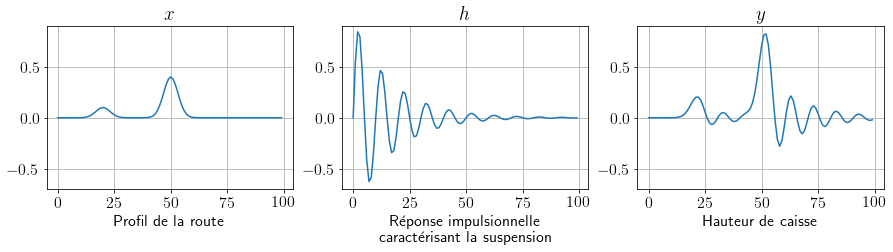

In [2]:
# Convolution 1D : amortisseur de voiture
N = 100
n = np.arange(0, N)
x = 1*np.exp(-(n-20)**2/20) + 4*np.exp(-(n-50)**2/20)
x = x/10
h1 = np.exp(-0.06*n)
h2 = np.sin(2*math.pi*n/10)
h = np.multiply(h1, h2)
y = np.convolve(x, h, mode="full")
y = y[0:N]
ylim = [-.7, .9]

fig = plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(n,x)
plt.title('$x$')
plt.xlabel('Profil de la route')
plt.ylim(ylim)
plt.subplot(1,3,2)
plt.plot(n,h)
plt.title('$h$')
plt.xlabel('Réponse impulsionnelle\ncaractérisant la suspension')
plt.ylim(ylim)
plt.subplot(1,3,3)
plt.plot(n,y)
plt.title('$y$')
plt.xlabel('Hauteur de caisse')
plt.ylim(ylim)
plt.show()

glue("G:convolution:suspension", fig, display=False)

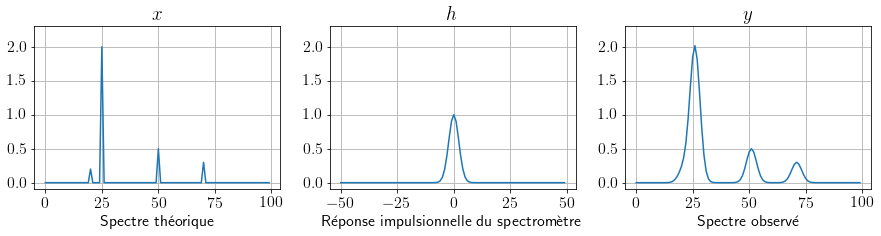

In [3]:
# Convolution 1D : spectre
N = 100
n = np.arange(0, N)
x = np.zeros(N)
x[20] = 0.2
x[25] = 2
x[50] = 0.5
x[70] = 0.3
h = np.exp(-(n-50)**2/10);
y = np.convolve(x, h, mode="same")
ylim = [-.1, 2.3]

fig = plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(n,x)
plt.title('$x$')
plt.xlabel('Spectre théorique')
plt.ylim(ylim)
plt.subplot(1,3,2)
plt.plot(n-N/2,h)
plt.title('$h$')
plt.xlabel('Réponse impulsionnelle du spectromètre')
plt.ylim(ylim)
plt.subplot(1,3,3)
plt.plot(n,y)
plt.title('$y$')
plt.xlabel('Spectre observé')
plt.ylim(ylim)
plt.show()

glue("G:convolution:spectre", fig, display=False)

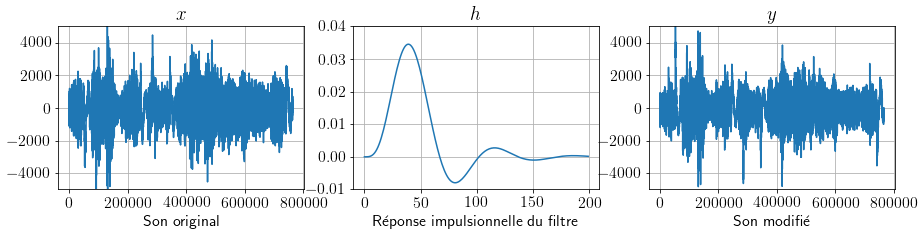

In [4]:
# Convolution 1D : son

# Chargement du son
fe, x = wavfile.read('../_static/Elise.wav')

# Signaux
N = len(x)
n = np.arange(0, N)
delta = np.zeros(x.shape)
delta[1000] = 1
[num, den] = butter(5, .03)
h = lfilter(num, den, delta)
y = lfilter(num, den, x)

# Sous-échantillonnage pour l'affichage
D = 100
n2 = n[0::D]
x2 = x[0::D]
h2 = h[0::D]
y2 = y[0::D]

# Affichage
ylim = [-5000, 5000]
fig = plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(n2,x2)
plt.title('$x$')
plt.xlabel('Son original')
plt.ylim(ylim)
plt.subplot(1,3,2)
plt.plot(h[1000:1200])
plt.title('$h$')
plt.xlabel('Réponse impulsionnelle du filtre')
plt.ylim([-.01, .04])
plt.subplot(1,3,3)
plt.plot(n2,y2)
plt.title('$y$')
plt.xlabel('Son modifié')
plt.ylim(ylim)
plt.show()

glue("G:convolution:son", fig, display=False)

Vous pouvez constater l'effet du filtrage en écoutant le signal audio original :

In [5]:
Audio(x, rate=fe)

... et le signal filtré :

In [6]:
Audio(y, rate=fe)

</div>

% ## Interprétation

## Propriétés

Soient $f$, $g$ et $h$ des signaux (à temps continu ou discret), et $a$ une constante. Le produit de convolution vérifie les propriétés suivantes.

```{panels}
:column: col-lg-6 col-md-12 col-sm-12 col-xs-12 p-2

Commutativité
^^^
$$f*g = g*f$$

---
Associativité
^^^
$$f*(g*h) = (f*g)*h$$

---
Distributivité
^^^
$$f*(g+h) = f*g + f*h$$

---

Identité
^^^
$$f*\delta = f$$

```